<font size="+3"><strong>Data Wrangling </strong></font>

<font size="+2"><strong>Preparing Mexico Data</strong></font>

In [51]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Import

The first step is read our data, csv files, into Data Frames using  pandas.

In [18]:
df1 = pd.read_csv("/home/tatenda/Desktop/dataset/data_set/mexico-real-estate-1-sell.csv")
df2 =pd.read_csv("/home/tatenda/Desktop/dataset/data_set/mexico-real-estate-2-sell.csv") 
df3 =pd.read_csv("/home/tatenda/Desktop/dataset/data_set/mexico-real-estate-3-sell.csv")

## Clean `df1`

Let's Inspect `df1` by looking at its [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) attribute. Then we will use the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.htm) method to see the data types and number of missing values for each column. Finally, use the [`head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) method to determine to look at the first five rows of the dataset.

In [19]:
df1.shape
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  699 non-null    object 
 1   state          699 non-null    object 
 2   lat            602 non-null    float64
 3   lon            602 non-null    float64
 4   price_usd      689 non-null    float64
 5   area_m2        396 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


,property_type,state,lat,lon,price_usd,area_m2
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,269000.0,110.0
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,230000.0,110.0
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,135000.0,41.0
3,apartment,Playa del Carmen,20.635482,-87.070345,185000.0,122.0
4,apartment,Nuevo Centro Urbano,20.629092,-87.074658,180000.0,NaN


Clean `df1` by dropping rows with `NaN` values. 

In [20]:
#dropping rows with missing values
df1.dropna(inplace=True)

df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 431
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  362 non-null    object 
 1   state          362 non-null    object 
 2   lat            362 non-null    float64
 3   lon            362 non-null    float64
 4   price_usd      362 non-null    float64
 5   area_m2        362 non-null    float64
dtypes: float64(4), object(2)
memory usage: 19.8+ KB


,property_type,state,lat,lon,price_usd,area_m2
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,269000.00,110.0
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,230000.00,110.0
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,135000.00,41.0
3,apartment,Playa del Carmen,20.635482,-87.070345,185000.00,122.0
5,apartment,Playa del Carmen,20.621580,-87.092398,85655.92,127.0


## Clean `df2`

In [21]:
df2.shape
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  699 non-null    object 
 1   state          699 non-null    object 
 2   lat            602 non-null    float64
 3   lon            602 non-null    float64
 4   price_mxn      689 non-null    float64
 5   area_m2        396 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


,property_type,state,lat,lon,price_mxn,area_m2
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,5059486.5,110.0
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,4325955.0,110.0
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,2539147.5,41.0
3,apartment,Playa del Carmen,20.635482,-87.070345,3479572.5,122.0
4,apartment,Nuevo Centro Urbano,20.629092,-87.074658,3385530.0,NaN


It can be seen that there are also rows with NaN values in `df2` and the home prices are in Mexican pesos ("price_mxn"), not US dollars ("price_usd"). If we want to compare all the home prices in this dataset, they all need to be in the same currency.
First, let's  drop rows with `NaN` values in `df2`. Next, use the `"price_mxn"` column to create a new column named `"price_usd"`. (Keep in mind that, when this data was collected in 2022, a dollar cost 19.96 pesos.) Finally, drop the `"price_mxn"` from the DataFrame.

In [22]:
#dropping rows with missing values
df2.dropna(inplace=True)

In [23]:
#creating a new column
df2["price_usd"] = df2["price_mxn"] /19.96
df2.head()

,property_type,state,lat,lon,price_mxn,area_m2,price_usd
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,5059486.50,110.0,253481.287575
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,4325955.00,110.0,216731.212425
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,2539147.50,41.0,127211.798597
3,apartment,Playa del Carmen,20.635482,-87.070345,3479572.50,122.0,174327.279559
5,apartment,Playa del Carmen,20.621580,-87.092398,1611059.37,127.0,80714.397295


In [24]:
#drop price_mxn column
df2 = df2.drop("price_mxn", axis="columns")
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,110.0,253481.287575
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,110.0,216731.212425
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,41.0,127211.798597
3,apartment,Playa del Carmen,20.635482,-87.070345,122.0,174327.279559
5,apartment,Playa del Carmen,20.621580,-87.092398,127.0,80714.397295


## Clean `df3`

In [25]:
df3.shape
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            699 non-null    object 
 1   place_with_parent_names  699 non-null    object 
 2   lat-lon                  602 non-null    object 
 3   price_usd                689 non-null    float64
 4   area_m2                  396 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.4+ KB


,property_type,place_with_parent_names,lat-lon,price_usd,area_m2
0,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627527,-87.076686",269000.0,110.0
1,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627567,-87.076718",230000.0,110.0
2,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.6267,-87.075866",135000.0,41.0
3,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.635482,-87.070345",185000.0,122.0
4,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.629092,-87.074658",180000.0,NaN


You'll notice that we still have `NaN` values, but there are two new problems:

1. Instead of separate `"lat"` and `"lon"` columns, there's a single `"lat-lon"` column. 
2. Instead of a `"state"` column, there's a `"place_with_parent_names"` column.

We need the resolve these problems so that `df3` has the same columns in the same format as `df1` and `df2`.

Let's drop rows with `NaN` values in `df3`. Then use the [`split`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) method to create two new columns from `"lat-lon"` named `"lat"` and `"lon"`, respectively.

In [26]:
#dropping rows with missing values
df3.dropna(inplace=True)

Let's use the [`split`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) method again, this time to extract the state for every house. (Note that the state name always appears after `"México|"` in each string.) Use this information to create a `"state"` column. Finally, we will drop the `"place_with_parent_names"` and `"lat-lon"` columns from the DataFrame.

In [27]:
#splitting lat-lon columns into lat and lon
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True)
df3.head()

,property_type,place_with_parent_names,lat-lon,price_usd,area_m2,lat,lon
0,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627527,-87.076686",269000.00,110.0,20.627527,-87.076686
1,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627567,-87.076718",230000.00,110.0,20.627567,-87.076718
2,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.6267,-87.075866",135000.00,41.0,20.6267,-87.075866
3,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.635482,-87.070345",185000.00,122.0,20.635482,-87.070345
5,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.62158,-87.092398",85655.92,127.0,20.62158,-87.092398


In [28]:
#Extracting state for every house
#df3["place_with_parent_names"].head()
df3["state"]=df3["place_with_parent_names"].str.split("|",expand=True)[2]
df3.head()


,property_type,place_with_parent_names,lat-lon,price_usd,area_m2,lat,lon,state
0,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627527,-87.076686",269000.00,110.0,20.627527,-87.076686,Quintana Roo
1,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.627567,-87.076718",230000.00,110.0,20.627567,-87.076718,Quintana Roo
2,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.6267,-87.075866",135000.00,41.0,20.6267,-87.075866,Quintana Roo
3,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.635482,-87.070345",185000.00,122.0,20.635482,-87.070345,Quintana Roo
5,apartment,|México|Quintana Roo|Solidaridad|Playa del Car...,"20.62158,-87.092398",85655.92,127.0,20.62158,-87.092398,Quintana Roo


In [29]:
#drop place_with_parent_names column
df3 = df3.drop("place_with_parent_names", axis="columns")
df3.head()

,property_type,lat-lon,price_usd,area_m2,lat,lon,state
0,apartment,"20.627527,-87.076686",269000.00,110.0,20.627527,-87.076686,Quintana Roo
1,apartment,"20.627567,-87.076718",230000.00,110.0,20.627567,-87.076718,Quintana Roo
2,apartment,"20.6267,-87.075866",135000.00,41.0,20.6267,-87.075866,Quintana Roo
3,apartment,"20.635482,-87.070345",185000.00,122.0,20.635482,-87.070345,Quintana Roo
5,apartment,"20.62158,-87.092398",85655.92,127.0,20.62158,-87.092398,Quintana Roo


## Concatenate DataFrames

Let's use [`pd.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to concatenate `df1`, `df2`, `df3` as new DataFrame named `df`.

In [30]:
df= pd.concat([df1, df2,df3])

df = df.drop("lat-lon", axis="columns")
print(df.shape)
df.head()

(1086, 6)


,property_type,state,lat,lon,price_usd,area_m2
0,apartment,Nuevo Centro Urbano,20.6275,-87.0767,269000.00,110.0
1,apartment,Nuevo Centro Urbano,20.6276,-87.0767,230000.00,110.0
2,apartment,Nuevo Centro Urbano,20.6267,-87.0759,135000.00,41.0
3,apartment,Playa del Carmen,20.6355,-87.0703,185000.00,122.0
5,apartment,Playa del Carmen,20.6216,-87.0924,85655.92,127.0


## Save `df`

The data is clean and in a single DataFrame, and can be saved  as a CSV file which will be examined  in  exploratory data analysis. 

In [31]:
df.to_csv("/home/tatenda/Desktop/dataset/data_set/mexico-real-estate-clean.csv", index=False)

<font size="+3"><strong>Exploratory Data Analysis </strong></font>

Let's get a feel for our data by summarizing its main characteristics using descriptive statistics and data visualization.
We will start by importing our clean dataset.

In [33]:
df = pd.read_csv("/home/tatenda/Desktop/dataset/data_set/mexico-real-estate-clean.csv")
df.head()

,property_type,state,lat,lon,price_usd,area_m2
0,apartment,Nuevo Centro Urbano,20.627527,-87.076686,269000.00,110.0
1,apartment,Nuevo Centro Urbano,20.627567,-87.076718,230000.00,110.0
2,apartment,Nuevo Centro Urbano,20.626700,-87.075866,135000.00,41.0
3,apartment,Playa del Carmen,20.635482,-87.070345,185000.00,122.0
4,apartment,Playa del Carmen,20.621580,-87.092398,85655.92,127.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1086 non-null   object 
 1   state          1086 non-null   object 
 2   lat            1086 non-null   float64
 3   lon            1086 non-null   float64
 4   price_usd      1086 non-null   float64
 5   area_m2        1086 non-null   float64
dtypes: float64(4), object(2)
memory usage: 51.0+ KB


While there are only two `dtypes` in our DataFrame (`object` and `float64`), there are three categories of  data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis. 


# Location Data: `"lat"` and `"lon"`

They say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the [`scatter_mapbox`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) from the plotly library.

In [36]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

It can be clearly seen that houses are not evenly distributed throughout the country. Rather, there are states or regions which are more prevelant!

# Categorical Data: `"state"`

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the `"state"` column. 

** Let's use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

In [37]:
top_10 = df["state"].value_counts().head(10)
top_10

Cuernavaca          200
Morelos             178
Estado de México     64
Yucatán              56
Distrito Federal     43
Campeche             33
Mérida               32
Nuevo León           21
Benito Juárez        20
Burgos               20
Name: state, dtype: int64

# Numerical Data: `"area_m2"` and `"price_usd"`

** Let's use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

In [38]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,1086.000000,1.086000e+03
mean,316.964088,2.216998e+05
std,450.048208,5.574952e+05
min,35.000000,1.122185e+04
25%,120.000000,5.498581e+04
50%,217.000000,1.245020e+05
75%,354.000000,2.273515e+05
max,5100.000000,1.000000e+07


Let's start by looking at `"area_m2"`. It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, surprisingly there a difference of almost 100 m<sup>2</sup> between them. We need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

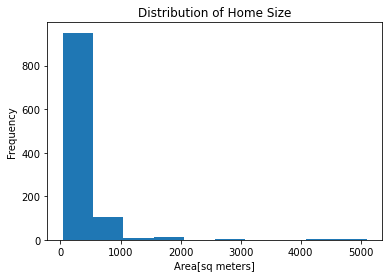

In [39]:
plt.hist(df['area_m2'])
plt.xlabel("Area[sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Size");

Looking at our histogram, we can see that `"area_m2"` skews left. In other words, there are more houses at the lower end of the distribution (50–1000m<sup>2</sup>) than at the higher end. That explains the difference between the mean and the median.

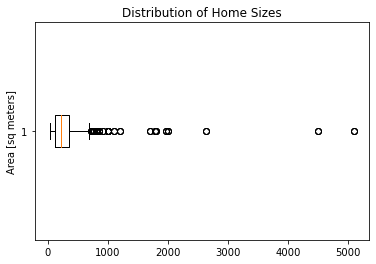

In [40]:
#Horizontal Box Plot
plt.boxplot(df["area_m2"],vert=False)
plt.ylabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

<font size="+3"><strong>Location or Size: What Influences House Prices in Mexico?</strong></font>

**Which state has the most expensive real estate market?**

** Let's use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to create a Series named `mean_price_by_state`, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price. 

In [61]:
mean_price_by_state =df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state.head(20)

state
Miguel Hidalgo           1.463688e+06
Piste                    9.598288e+05
Pedro Escobedo           7.885481e+05
Marina Brisas            6.021160e+05
Campeche 1               5.256987e+05
Zazil Ha                 4.078850e+05
Puebla                   4.017343e+05
Yautepec                 3.935293e+05
Distrito Federal         3.789581e+05
Guerrero                 3.370657e+05
Cuernavaca               3.319090e+05
Sumiya                   3.183933e+05
Cuajimalpa de Morelos    2.891343e+05
Tlalpan                  2.733633e+05
Morelos                  2.680385e+05
Temozon Norte            2.628494e+05
Sonora                   2.571237e+05
Querétaro                2.566092e+05
Monterrey                2.501629e+05
Hermosillo               2.497069e+05
Name: price_usd, dtype: float64

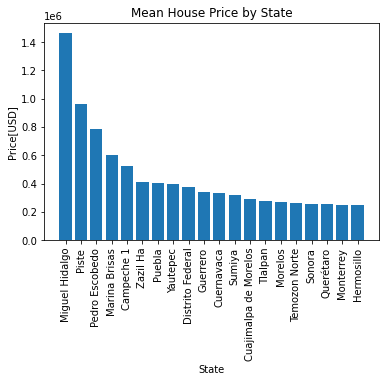

In [62]:
#Bar chart for the mean_price_per_state (20 states only in descending order of price)
plt.bar(x=mean_price_by_state.head(20).index, height=mean_price_by_state.head(20).values)
plt.ylabel("Price[USD]")
plt.xlabel("State")
plt.title("Mean House Price by State")
plt.xticks(rotation=90);

It seems odd that Miguel Hildalgo would be the most expensive real estate market in Mexico when, [according to recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m<sup>2</sup>. In order to do that, we need to create a new column.

** Let's create a new column in `df` called `"price_per_m2"`. This should be the price for each house divided by it's size. 

In [63]:
df["price_per_m2"]=df["price_usd"]/df["area_m2"]

In [64]:
mean_price_per_m2_by_state =df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
mean_price_per_m2_by_state.head(20)

state
Zazil Ha               2872.429719
Nuevo Centro Urbano    2170.785093
Marina Brisas          2150.414221
Quintana Roo           1508.074894
Benito Juárez          1378.256046
Guerrero               1287.580524
Xochimilco             1239.654439
Playa del Carmen       1233.392595
Cuauhtémoc             1215.503776
Nayarit                1195.312500
Bucerías               1160.833483
Yautepec               1096.785332
Miguel Hidalgo         1080.323029
Distrito Federal       1062.195886
Venustiano Carranza    1046.689634
Mazatlán               1037.978429
Álvaro Obregón          939.342336
Coyoacán                932.677154
Campeche 1              886.507122
Azcapotzalco            884.032111
Name: price_per_m2, dtype: float64

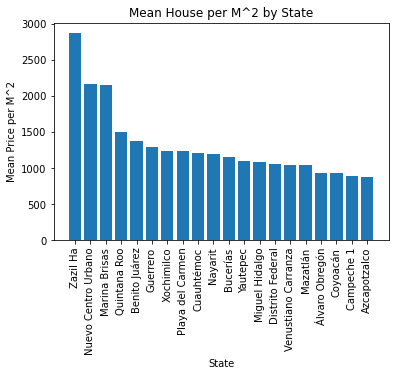

In [66]:
#Bar chart for the mean_price_per_m2_per_state (20 states only in descending order of price)
plt.bar(x=mean_price_per_m2_by_state.head(20).index, height=mean_price_per_m2_by_state.head(20).values)
plt.ylabel("Mean Price per M^2")
plt.xlabel("State")
plt.title("Mean House per M^2 by State")
plt.xticks(rotation=90);

Now there is a better reflection of the prices as compared to the GDP rankings!

**Is there a relationship between home size and price?**

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

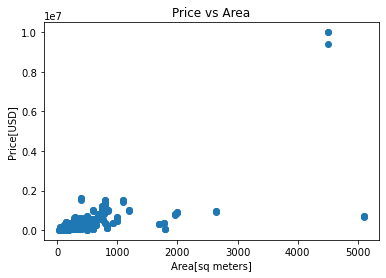

In [67]:
plt.scatter(x=df["area_m2"],y=df["price_usd"])
plt.xlabel("Area[sq meters]")
plt.ylabel("Price[USD]")
plt.title("Price vs Area");

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. Let's quantify this correlation? 

In [68]:
p_correlation =df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.6490759027937612


The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states.

 First, let's create a new DataFrame called `df_mexico_city` that includes all the observations from `df` that are part of the *Distrito Federal*. Next, let's create a scatter plot that shows price vs area. Finally, let's calculate the  correlation coefficient for `"area_m2"` and `"price_usd"` in `df_mexico_city`.

0.9931690589690925


,property_type,state,lat,lon,price_usd,area_m2,price_per_m2
757,apartment,Distrito Federal,19.415010,-99.175174,146154.51,61.0,2395.975574
758,apartment,Distrito Federal,19.415010,-99.175174,343571.36,176.0,1952.110000
778,apartment,Distrito Federal,19.456564,-99.191724,36267.97,65.0,557.968769
785,apartment,Distrito Federal,19.512787,-99.141393,75783.82,82.0,924.192927
788,house,Distrito Federal,19.358776,-99.213557,361597.08,346.0,1045.078266


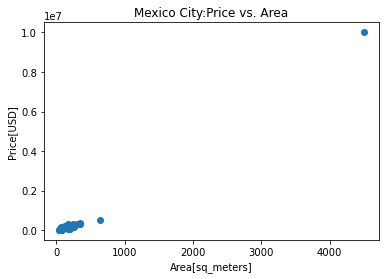

In [69]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city =df[df["state"]=="Distrito Federal"]

# Create a scatter plot price vs area
plt.scatter(x=df_mexico_city["area_m2"],y=df_mexico_city["price_usd"])
plt.xlabel("Area[sq_meters]")
plt.ylabel("Price[USD]")
plt.title("Mexico City:Price vs. Area");


p_correlation =df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)
df_mexico_city.head()

Looking at the scatter plot and correlation coefficient, there's see a very strong relationship between size and price. This means in the capital city, size is a very important factor in determining the size of a real estate.

